IMPORT LIBRARIES AND OTHER ESSENTIALS


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']= False

WORKING ON THE ENERGY DATA
LINK: https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv



In [ ]:
df= pd.read_csv('/content/energydata_complete.csv')

In [ ]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
df['date']=pd.to_datetime(df['date'], infer_datetime_format= True)

<ipython-input-5-3d3fc9e19174>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date']=pd.to_datetime(df['date'], infer_datetime_format= True)


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

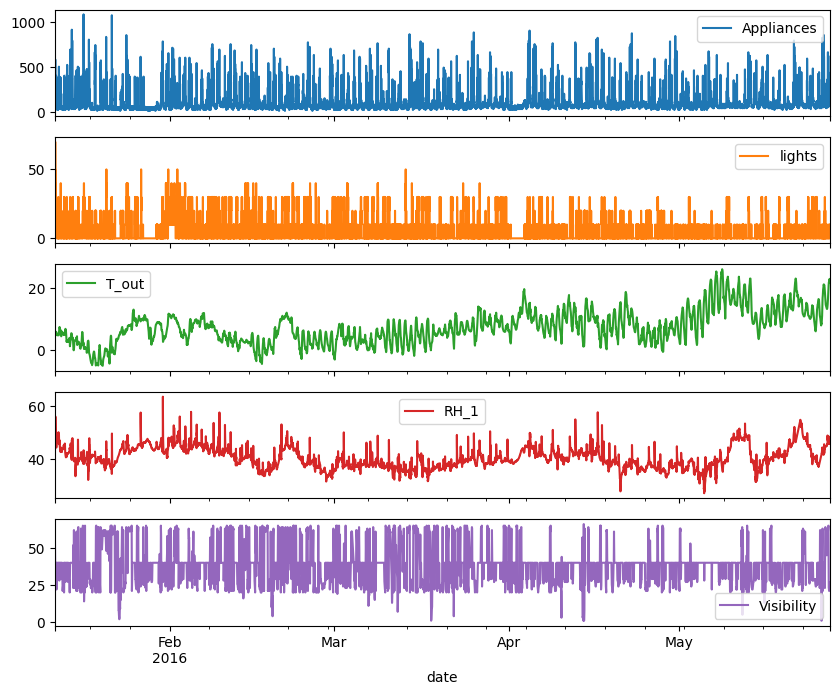

In [ ]:
df.set_index('date')[['Appliances', 'lights', 'T_out', 'RH_1','Visibility']].plot(subplots=True)

* Appliances: Energy usage in Wh
* T_out: Outside Temperature
* RH_1: Humidity in kitchen area in %
* Visibility: Visibility in km




In [ ]:
df_input=df[['Appliances', 'T_out', 'RH_1','Visibility']]

In [ ]:
df_input

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667
...,...,...,...,...
19730,100,22.733333,46.560000,23.666667
19731,90,22.600000,46.500000,24.500000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [ ]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


DETECTING OUTLIERS

In [ ]:
df_input.query("Appliances>500")

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


MIN MAX SCALING TO MAKE THE GRADIENTS TO CONVERGE FASTER

In [ ]:
scaler= MinMaxScaler()
data_scaled= scaler.fit_transform(df_input)



In [ ]:
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [ ]:
features=data_scaled
target=data_scaled[:,0]

CALLING THE TIME SERIES GENERATOR FUNCTION

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

TRAIN TEST SPLIT

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [ ]:
x_train.shape

(15788, 4)

In [ ]:
x_test.shape

(3947, 4)

In [ ]:
win_length=720
batch_size=32
num_features=4
train_generator= TimeseriesGenerator(x_train, y_train, length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator= TimeseriesGenerator(x_test, y_test, length=win_length,sampling_rate=1,batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

CREATING THE MODEL ARCHITECTURE

In [ ]:
model= tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 720, 128)          68096     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)               

COMPILING :

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history= model.fit_generator(train_generator, epochs=50,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[early_stopping])

Epoch 1/50


<ipython-input-78-436d0dd0c029>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(train_generator, epochs=50,


471/471 [==============================] - 45s 82ms/step - loss: 0.0085 - mean_absolute_error: 0.0512 - val_loss: 0.0055 - val_mean_absolute_error: 0.0440
Epoch 2/50
471/471 [==============================] - 34s 73ms/step - loss: 0.0066 - mean_absolute_error: 0.0425 - val_loss: 0.0041 - val_mean_absolute_error: 0.0294
Epoch 3/50
471/471 [==============================] - 36s 76ms/step - loss: 0.0047 - mean_absolute_error: 0.0345 - val_loss: 0.0033 - val_mean_absolute_error: 0.0279
Epoch 4/50
471/471 [==============================] - 35s 75ms/step - loss: 0.0042 - mean_absolute_error: 0.0322 - val_loss: 0.0032 - val_mean_absolute_error: 0.0284
Epoch 5/50
471/471 [==============================] - 35s 73ms/step - loss: 0.0041 - mean_absolute_error: 0.0313 - val_loss: 0.0032 - val_mean_absolute_error: 0.0278
Epoch 6/50
471/471 [==============================] - 36s 75ms/step - loss: 0.0041 - mean_absolute_error: 0.0309 - val_loss: 0.0032 - val_mean_absolute_error: 0.0276
Epoch 7/50
471/

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

<ipython-input-79-a68ec1088d46>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.003192607080563903, 0.028414655476808548]

MAKING PREDICTIONS:

In [ ]:
predictions=model.predict_generator(test_generator)

<ipython-input-80-6ca49477046f>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model.predict_generator(test_generator)


In [ ]:
predictions.shape[0]

3227

In [ ]:
predictions


array([[0.06698065],
       [0.09497338],
       [0.11910683],
       ...,
       [0.08949904],
       [0.2702847 ],
       [0.2660659 ]], dtype=float32)

In [ ]:
y_test

array([0.3364486 , 0.54205607, 0.28971963, ..., 0.24299065, 0.38317757,
       0.39252336])

In [ ]:
x_test

array([[0.3364486 , 0.34297964, 0.30923768, 0.6       ],
       [0.54205607, 0.34726688, 0.3055683 , 0.6       ],
       [0.28971963, 0.35155413, 0.30455921, 0.6       ],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [ ]:
x_test[:,1:][win_length:]

array([[0.45337621, 0.20851298, 0.6       ],
       [0.47106109, 0.18282726, 0.6       ],
       [0.48874598, 0.18466196, 0.6       ],
       ...,
       [0.88317256, 0.53866618, 0.37435897],
       [0.87888532, 0.54949087, 0.38717949],
       [0.87459807, 0.53875791, 0.4       ]])

In [ ]:
x_test[:,1:][win_length:].shape[0]

3227

In [ ]:

df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])], axis=1)


In [ ]:
df_pred

,0,0,1,2
0,0.066981,0.453376,0.208513,0.600000
1,0.094973,0.471061,0.182827,0.600000
2,0.119107,0.488746,0.184662,0.600000
3,0.345854,0.506431,0.193996,0.600000
4,0.149577,0.524116,0.181818,0.600000
...,...,...,...,...
3222,0.088931,0.891747,0.537657,0.348718
3223,0.103870,0.887460,0.536006,0.361538
3224,0.089499,0.883173,0.538666,0.374359
3225,0.270285,0.878885,0.549491,0.387179


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

Appliances    3227
T_out         3227
RH_1          3227
Visibility    3227
dtype: int64

In [ ]:
df_final['App_Pred']=rev_trans[:,0]

<ipython-input-96-62669267b60b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [ ]:
df_final

,Appliances,T_out,RH_1,Visibility,App_Pred
16508,90,9.100000,34.600000,40.000000,81.669298
16509,120,9.650000,33.666667,40.000000,111.621514
16510,390,10.200000,33.733333,40.000000,137.444307
16511,240,10.750000,34.072500,40.000000,380.063572
16512,120,11.300000,33.630000,40.000000,170.046999
...,...,...,...,...,...
19730,100,22.733333,46.560000,23.666667,105.155933
19731,90,22.600000,46.500000,24.500000,121.141144
19732,270,22.466667,46.596667,25.333333,105.763974
19733,420,22.333333,46.990000,26.166667,299.204642


PLOTTING THE ACTUAL AND PREDICTED VALUES TOGETHER

<Axes: >

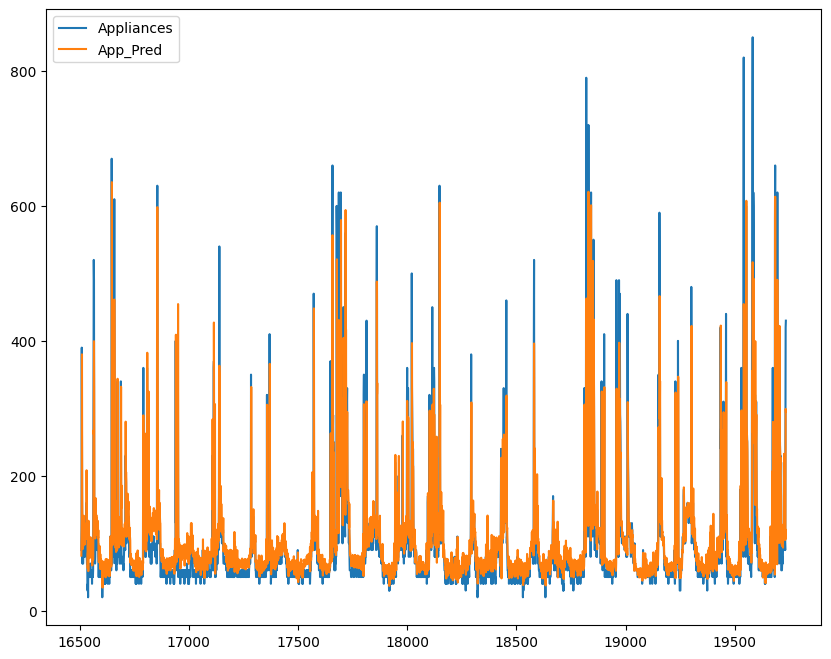

In [ ]:
df_final[['Appliances','App_Pred']].plot()